
# Università di Urbino Carlo Bo
# Progetto Modello XY in same di simulazione numerica
Sessione estiva 2025 12 Giugno primo appello. <br>
Docente: Andrea Viceré. <br>
Studente: Gianmarco Beligni 321069.


#### Lattice

We use again a two-dimensional, square lattice, that we will call $\Lambda$, with *periodic* boundary conditions. Define $L$ as the side of the square; then the lattice $\Lambda$ contains $N = L^2$ nodes.

#### Node

On each node of the lattice $\Lambda$, we place a single, unit vector $\mathbf{s}_i$ which can have any orientation in the plane: that is, at site $i$, we have

\begin{equation}
\mathbf{s}_i = \left(\cos\theta_i, \sin\theta_i\right) = (x_i, y_i)
\end{equation}

where $\theta \in [0, 2\pi)$, or alternatively $x_i^2 + y_i^2 = 1$

#### Configuration

A spin configuration $\mathbf{S}$ of the model is simply a set of spins $\mathbf{s}_j$ on the lattice $\Lambda$, that is $\mathbf{S} = \left\{\mathbf{s}_j\ \mathrm{for}\ j\in\Lambda\right\}$.

#### Energy

The energy of a configuration, in presence of an external magnetic field $H$, is simply given by

\begin{equation
E = - J \sum_{\langle i, j\rangle} \mathbf{s}_i\cdot\mathbf{s}_j - H\sum_i x_i 
\end{equation}

which can be rewritten in terms just of the angles $\theta_i$ as 

\begin{equation}
E = - J \sum_{\langle i, j\rangle} \cos\left(\theta_i - \theta_j\right) - H\sum_i \cos\theta_i\ .
\end{equation}

The sum over $\langle i, j\rangle$ is meant to run over the nearest neighbours only, as we did for the Ising 2D model. In the following, we can assume $J=1$.

#### Distribution

As for the Ising model, we assume that the probability of a configuration $\mathbf{S}$ is given by 

\begin{equation}
P(\mathbf{S}|\beta) = {\cal N} e^{-\beta E}
\end{equation}

with ${\cal N}$ an appropriate normalization, which is irrelevant in the following, and $\beta = \frac{1}{T}$ (we set $\kappa_B = 1$ for simplicity).

#### Interesting quantities

You can define several interesting quantities:

**Specific heat $C_V$**

The specific heat (per site) is defined as 

\begin{equation}
C_V = \frac{1}{N\times T^2} \left(\langle E^2\rangle -   \langle E\rangle^2\right)
\end{equation}

where $E$ is the total energy, $N$ is the number of sites on the lattice, and the average $\langle\ldots\rangle$ is taken over several realizations, at fixed temperature $T$

**Magnetization per site**

The total magnetization is simply

\begin{equation}
\mathbf{M} = \sum_{i\in \Lambda} \mathbf{s}_i = \sum_{i\in \Lambda} \left(\cos\theta_i, \sin\theta_i\right)
\end{equation}

To visualize it, is better to take the absolute value 

\begin{equation}
M = \left|\mathbf{M}\right| = \sqrt{M_x^2 + M_y^2}
\end{equation}

and the magnetization per site is simply

\begin{equation}
m = \frac{M}{N}
\end{equation}

**Magnetic susceptibility per site**

As for the specific heat, we define the magnetic susceptibility per site as

\begin{equation}
\chi_m = \frac{1}{N\times T}\left(\langle M^2\rangle - \langle M\rangle^2\right)
\end{equation}

where $M$ is the absolute value of the total magnetization.

## 1) Code the XY model using the angles $\theta_i$ as variables on the lattice $\Lambda$.
Ho rappresentato il modello XY in una classe Python per tenere tutti i dati un singolo oggetto(facile per la creazione di più modelli).<br>
Ho racchiuso il modello in una classe anche per sfruttare la "inheritance" delle classi python per aggiungere funzionalità alla classe ModelloXY quando ne avremo bisogno.<br>
Come configurazione iniziale ho deciso di prendere gli angoli da una distribuzione uniforme in quanto non specificato nel problema.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
class ModelloXY:
    '''
    Classe che rappresenta il modello XY
    Parametri:
    ----------
    L: int
        lunghezza del reticolo
    J: float
        costante di accoppiamento
        quanto celle vicine influenzano la cella stessa
        default: 1
    T: float
        temperatura del sistema
    H: float
        campo magnetico
    '''
    def __init__(self, L=4, J=1.0, T=1.0, H=0.0):
        # lunghezza del reticolo
        self.L = L
        # numero caselle
        self.N = L*L
        # costante di accoppiamento di default è 1
        self.J = J
        # temperatura del sistema
        self.T = T
        # campo magnetico
        self.H = H
        # costante Beta
        self.beta = 1.0/T 
        # array 2D contenente gli angoli iniziali degli spin
        self.theta = np.random.uniform(0,2*np.pi, size = (self.L,self.L))
        # array 2D che contiene le componenti x dello spin
        self.sx = np.cos(self.theta)
        # array 2D che contiene le componenti y dello spin
        self.sy = np.sin(self.theta)
        self.sotto = np.roll(self.theta, 1, 0)
        self.sopra = np.roll(self.theta, -1, 0)
        self.destra = np.roll(self.theta, 1, 1)
        self.sinistra = np.roll(self.theta, -1, 1)
        # numero di iterazioni della simulazione
        self.iterazioni = 0
        
 
        
        
    

# 2) Use the Metropolis-Hastings algorithm to update the configurations: consider the example provided in 06.03 as a suggestion about coding efficiently the update step.
L'algoritmo di Metropolis-Hastings viene usato quando si vuole simulare una determinata distribuzione in questo caso la nostra è 
\begin{equation}
P(\mathbf{S}|\beta) = {\cal N} e^{-\beta E}
\end{equation}, l'algoritmo si può riassumere nei seguenti passaggi: <br>
1. Scegliere una Densità di probabilta $Q(S^*|S)$ che sia simmetrica $Q(S|S^*) = Q(S^*|S)$(utile per esplorare tutte le possibili configurazioni)
2. Prendere un'altra configurazione $S^*$ da $Q$
3. Calcolare $\alpha = P(S^*|\beta)/P(S|\beta)$ se $\geq 1$ accettare lo stato, se $\lt 1$ accettarlo con probabilità alpha 
   
 Come $Q(S^*|S)$ ho scelto una gaussiana centrata in S con $\sigma = \sqrt T$ per avere per tutta la simulazione delle temperature tra 0.1 e 2 una accettazione di circa il 50% $\space$  $ Q(S^*|S) = e^{-\frac{(S^*-S)}{2\sigma^2}}$<br>
 La formula per alpha è
\begin{equation}
 \alpha = \frac{P(S^*)}{P(s)}= \frac{N*e^{-\beta E(S^*)}}{N*e^{-\beta E(S)}} = e^{-\beta \Delta E}
 \end{equation}
 Abbiamo bisogno di delta E se scambiamo l'angolo nel indice k $\theta_k$  in $\theta'_k$  che è
 \begin{equation}
 \Delta E = E_f - E_i = -J \sum_{\langle i\neq k,j\rangle}[cos(\theta_i-\theta_j)] -J[\cos(\theta'_k-\theta_j)] - H \sum_{i\neq k} [cos(\theta_i)] -H\cos(\theta'_k)-(-J\sum_{\langle i,j \rangle}[\cos(\theta_i-\theta_J)] - H \sum_{i}\cos(\theta_i)) \rightarrow
 \end{equation}
 \begin{equation}
 -J \sum_{j\in \delta k}\cos(\theta'_k-\theta_j) + J \sum_{j\in \delta k}\cos(\theta_k-\theta_j) - H\cos(\theta'_k) + H\cos(\theta_k) \rightarrow
 \end{equation}
 \begin{equation}
\Delta E = J\sum_{j\in \delta k}[\cos(\theta_k-\theta_j) - \cos(\theta'_k-\theta_j)] + H(\cos(\theta_k)-cos(\theta'_k))
 \end{equation}
 Una volta trovata la matrice 2D contenente per ogni casella la differenza di energia che si avrebbe se quella casella si scambiasse con l'angolo generato dalla distribuzione Q, possiamo metterla nella formula $\alpha = e^{-\beta \Delta E}$ ottenendo cosi una matrice 2D contenente le probabilità che cambiare l'angolo in quella determinata casella sia favorevole, se è maggiore o uguale a 1 la accettiamo mentre se minore di 1 la accettiamo con probabilità $\alpha$, un ottimizzazzione trovata nel capitolo 6.3 come suggerito dal problema è usare una maschera per non fare l'update delle caselle adicenti però ho deciso di non utilizzare di fare l'update di una sotto parte, nel modello ising avevamo deciso di cambiare spin a solo una sotto parte(dopo la maschera) invece qui ho deciso di non usarlo poichè il cambiamento dell'angolo nel modello XY non è tanto brusco come cambiare lo spin nel modello ising.
Ho creato una fase di termalizzazione dove ripeto l'algoritmo di Metropolis-Hasting fino a quando finisco il periodo o l'energia converge ad un errore di 1E-2 superato il periodo di termalizzazione c'è il periodo di misura dove misurero il calore specico e la suscettività magnetica

In [6]:
import math
class ModelloXY(ModelloXY):
    def q(self):
        sigma = min(np.sqrt(self.T),self.T)
        rumore_gaussiano = (sigma)*np.random.randn(self.L, self.L)
        return (self.theta + rumore_gaussiano + 2*np.pi)% (2*np.pi)

    def energia_totale(self):
        E = np.zeros( (self.L, self.L), float)
        # usiamo numpy.roll perchè i confini sono periodici
        # E = -J * sum<i,j> cos(theta - theta_j) - H * sum<i> cos(theta) 
        E = -self.J * (np.cos(self.theta - np.roll(self.theta, 1, 0)) +  # down neighbor
                       np.cos(self.theta - np.roll(self.theta, 1, 1))) - self.H*np.cos(self.theta)
        return np.sum(E)
        
    def magnetizzazione_per_sito(self):
        return np.sum(np.cos(self.theta)), np.sum(np.sin(self.theta))
    def magnetizzazione(self):
        self.sx = np.cos(self.theta)
        self.sy = np.sin(self.theta)
        x = np.sum(self.sx)  
        y = np.sum(self.sy)
        return math.sqrt(x*x+y*y) 
        
        
    def delta_energia(self,angoli_nuovi):
        sotto = np.roll(self.theta, 1, 0)
        sopra = np.roll(self.theta, -1, 0)
        destra = np.roll(self.theta, 1, 1)
        sinistra = np.roll(self.theta, -1, 1)
        dE = np.zeros( (self.L, self.L), float)
        dE =  self.J * (np.cos(self.theta-sotto)-np.cos(angoli_nuovi-sotto) +
                        np.cos(self.theta-sopra)-np.cos(angoli_nuovi-sopra) +
                        np.cos(self.theta-destra)-np.cos(angoli_nuovi-destra) +
                        np.cos(self.theta-sinistra)-np.cos(angoli_nuovi-sinistra)) + self.H * (np.cos(self.theta)-np.cos(angoli_nuovi))       
        return dE
        
    # probabilità di accettare uno stato di angoli
    def probabilita_transizione(self,angoli_nuovi):
         return np.exp(-self.beta * self.delta_energia(angoli_nuovi) )
        
    # algoritmo di Metropolis-Hastings 
    def evolvi(self,**kwargs):
        """Evolve il modello XY dato un certo numero di passi
        Ritorna una tupla con approssimizzazione della magnetizzazzione, energia e capacità di calore 
        Parametri optionali---------
        step_termalizzazione : int
        numero di step di termalizzazione (default 100)
        periodo_misura : int
        dopo ogni quanti step avviene la misura (default 10)
        intervallo_misura : int
        intervallo tra misure (default 10)
        """
        periodo_termalizzazione = int(kwargs.get('periodo_termalizzazione',100))
        frazione             = float(kwargs.get('frazione',0.1))
        periodo_misura          = int(kwargs.get('periodo_misura',1000))
        intervallo_misura    = int(kwargs.get('intervallo_misura',10))
        energia = 0.
        energia_quadra = 0.
        magnetizzazione = 0.
        magnetizzazione_quadra = 0.
        step_totali = 0.
        indice_misura = 0
        accettati = 0
        energie = []
        converge = False
        suscettivita_magnetica = 0.
        calore_specifico_per_sito = 0.
        rateo_accettazione = []
        convergenza_intervallo = int(kwargs.get('convergenza_intervallo', 100))  # Steps to average over
        convergenza_errore = float(kwargs.get('convergenza_error', 1e-3))  
        # Maschera per escludere cambiare quelli adiacenti
        mask = np.zeros((self.L, self.L), dtype=bool)
        mask[::2, ::2] = True  # Checkerboard pattern
        mask[1::2, 1::2] = True
        for i in range(0,periodo_termalizzazione + periodo_misura):
            # Nuovi angoli presi dalla distribuzione Q
            nuovi_angoli = self.q()
            # Array 2d che contiene la probabilità che l'angolo in casella (i,j) venga sostituito da un nuovo angolo preso dalla distribuzione
            prob = self.probabilita_transizione(nuovi_angoli)
            # array 2d che contiene True dove cambiare angolo abbassa l'energia totale
            transizioni = (np.random.random_sample( (self.L, self.L) ) < prob) & mask
            accettati += np.sum(transizioni)
            step_totali += self.L*self.L/2
            # array 2d che contiene il risultato dell'evoluzione
            result = np.where(transizioni,nuovi_angoli,self.theta)
            self.theta = result
            self.sx = np.cos(result)
            self.sy = np.sin(result)
            mask = ~mask
            self.iterazioni += 1
            # controlliamo energia del sistema
            energie.append(self.energia_totale() / self.N) 

            #controlla convergenza ogni 100 passi
            if i % 100 == 0 and i > 1000 and not converge:
                media = np.mean(energie[-1000:])
                media_prev = np.mean(energie[-2000:-1000])
                
                if np.abs(media - media_prev) / np.abs(media_prev) < 1e-4: 
                    print(f"Converge al passo {i}")
                    converge = True
                    i = periodo_termalizzazione
                    
           
            # misurazione dopo periodo di termalizzazione
            if i >= periodo_termalizzazione and i % intervallo_misura == 0:
                e_tmp = self.energia_totale()
                energia += e_tmp
                energia_quadra += e_tmp**2
                m_temp = self.magnetizzazione()
                magnetizzazione += m_temp
                magnetizzazione_quadra += m_temp**2
                indice_misura += 1
        print(f"rateo accettazione è:{accettati / step_totali} ")        
        # entra qui solo se abbiamo superato le iterazioni per la misurazione
        if indice_misura > 0:
            energia /= float(indice_misura)
            energia_quadra /= float(indice_misura)
            magnetizzazione /= float(indice_misura)
            magnetizzazione_quadra /= float(indice_misura)
            suscettivita_magnetica = (magnetizzazione_quadra - (magnetizzazione*magnetizzazione))/(self.T*self.N)
            calore_specifico_per_sito = (energia_quadra - energia*energia)/(self.T**2*self.N)
        if not converge:
            print("Questa simulazione non ha raggiunto la convergenza aumentare il periodo di termalizzazione")
            
        return [suscettivita_magnetica, calore_specifico_per_sito,energia]
        


Per trovare i vertici prendo tutte le coppie adiacenti e le sottraggo e guardo se la loro somma fanno un giro ovvero 2pi i vortici sono quelli a senso orario e antivortici a senso antiorario non sono riuscito a a trovare le frecce entranti e uscenti

In [7]:
import matplotlib.pyplot as plt
class ModelloXY(ModelloXY):
    def find_vortici(self, soglia= 0.99):
        theta = self.theta
        # Calcola tutte le differenze angolari in una volta sola
        delta1 = (theta - np.roll(theta, -1, axis=1) + np.pi) % (2*np.pi) - np.pi  
        delta2 = (np.roll(theta, -1, axis=1) - np.roll(theta, (-1,-1), axis=(0,1)) + np.pi) % (2*np.pi) - np.pi  
        delta3 = (np.roll(theta, (-1,-1), axis=(0,1)) - np.roll(theta, -1, axis=0) + np.pi) % (2*np.pi) - np.pi
        delta4 = (np.roll(theta, -1, axis=0) - theta + np.pi) % (2*np.pi) - np.pi  # Sotto -> corrente
    
        # Somma vettorizzata
        avvolgimento_totale = delta1 + delta2 + delta3 + delta4
        numeri_avvolgimenti = avvolgimento_totale / (2*np.pi)
    
        # Identificazione vortici
        antivortici = (numeri_avvolgimenti > soglia)
        vortici = (numeri_avvolgimenti < -soglia)
    
        return vortici, antivortici, numeri_avvolgimenti
    
 
     
    def disegna(self):

        plt.figure(figsize=(8, 10))  
    
        
        plt.subplot(2, 1, 1)  
        X, Y = np.meshgrid(np.arange(self.L), np.arange(self.L))
        U = np.cos(self.theta)
        V = np.sin(self.theta)
        scala = 30
        plt.quiver(X, Y, U, V, pivot='mid', scale=scala)
        plt.title("Spin Configuration with vortici")
    
        # trova vortici
        vortici , antivortici, angoli= self.find_vortici()
        vy, vx = np.where(vortici)
        avy, avx = np.where(antivortici)
    
        plt.scatter(vx+0.5, vy+0.5, color='red', s=50, label='Vortici (+1)')
        plt.scatter(avx+0.5, avy+0.5, color='blue', s=50, label='Antivortici (-1)')
        plt.savefig(f'T={self.T}.png')
        plt.xlabel(r'$m = ${}, $e = ${}'.format(self.magnetizzazione()/self.N,self.energia_totale()))
        plt.legend()
        plt.tight_layout()
        plt.show()

   

Simulazione T = 0.10
Converge al passo 5300
rateo accettazione è:0.8068764444444444 


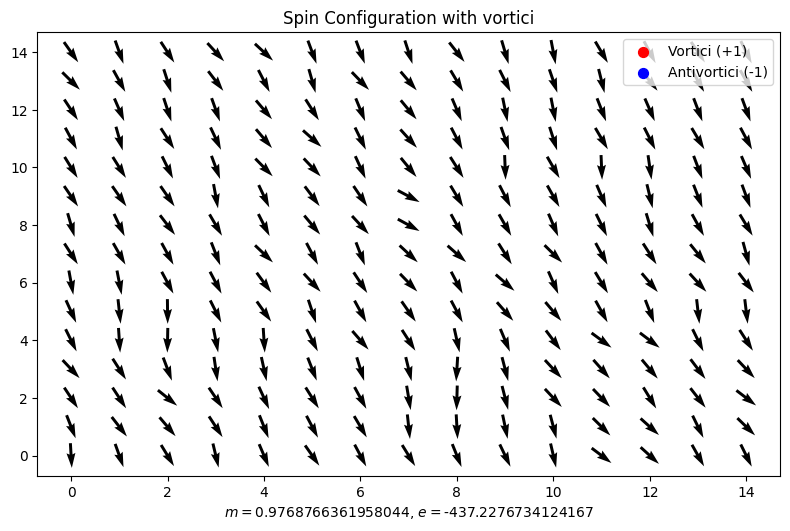

Simulazione T = 0.20
Converge al passo 3600
rateo accettazione è:0.7372928148148148 
Simulazione T = 0.30
Converge al passo 3200
rateo accettazione è:0.6895953333333333 


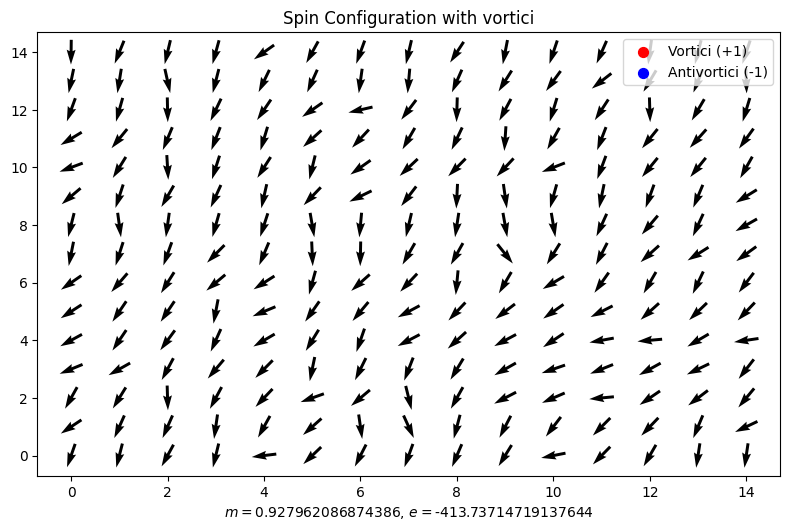

Simulazione T = 0.40
Converge al passo 6900
rateo accettazione è:0.6537865925925926 
Simulazione T = 0.50
Converge al passo 5000
rateo accettazione è:0.6257136296296296 
Simulazione T = 0.60
Converge al passo 5400
rateo accettazione è:0.6031416296296296 


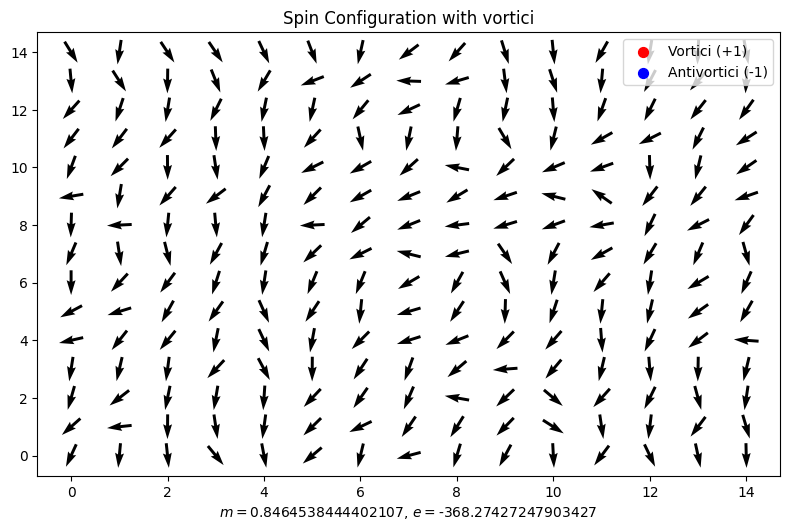

Simulazione T = 0.70
Converge al passo 3500
rateo accettazione è:0.5853822962962963 
Simulazione T = 0.80
Converge al passo 2700
rateo accettazione è:0.572124 
Simulazione T = 0.90
Converge al passo 11700
rateo accettazione è:0.5631636296296296 


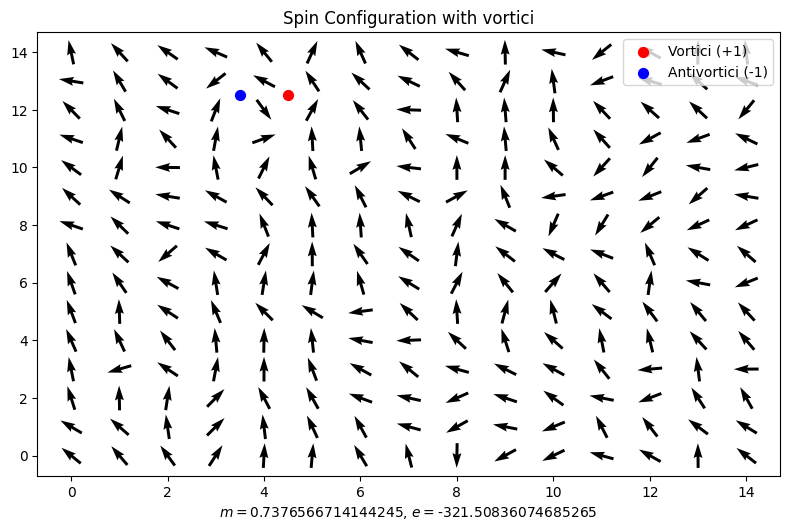

Simulazione T = 1.00
Converge al passo 6700
rateo accettazione è:0.5609834074074074 
Simulazione T = 1.10
Converge al passo 5900
rateo accettazione è:0.5811147407407408 


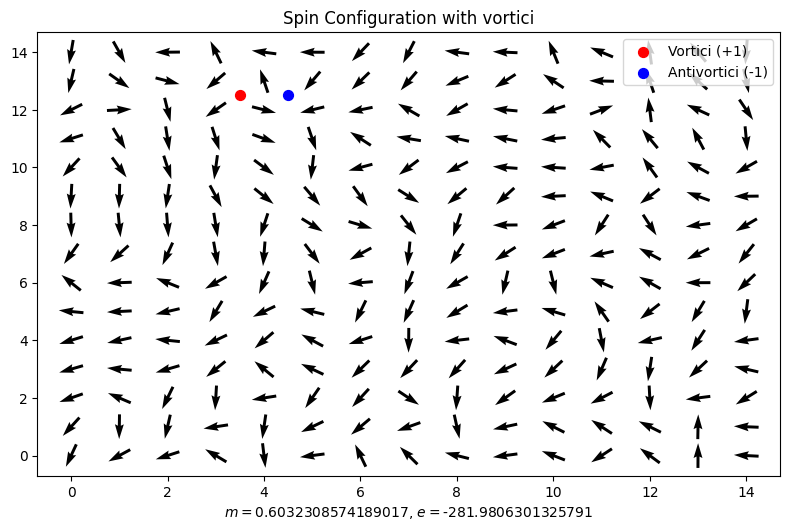

Simulazione T = 1.20
Converge al passo 103700
rateo accettazione è:0.6069038518518518 


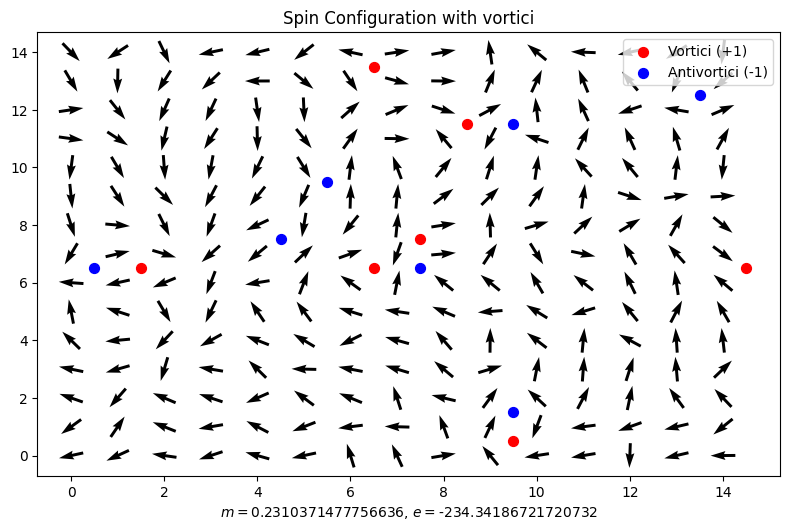

Simulazione T = 1.30
Converge al passo 24600
rateo accettazione è:0.6289851111111111 
Simulazione T = 1.40
Converge al passo 47800
rateo accettazione è:0.6477431111111112 
Simulazione T = 1.50
Converge al passo 42000
rateo accettazione è:0.6647010370370371 


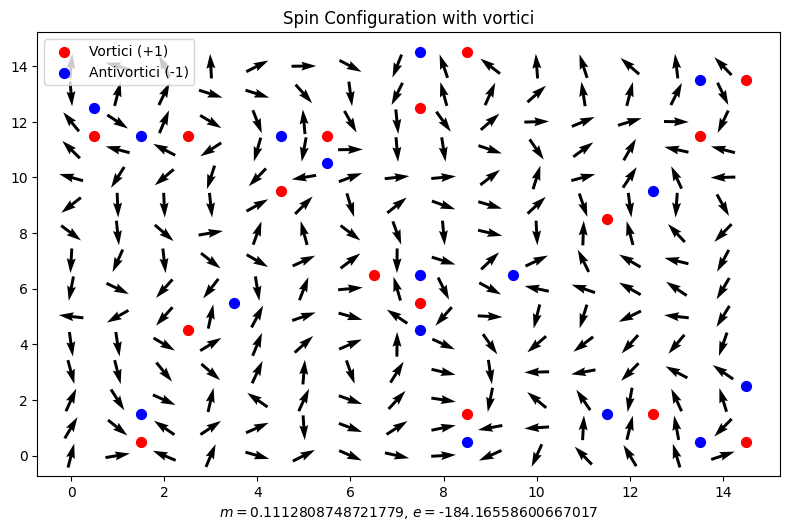

Simulazione T = 1.60
Converge al passo 21400
rateo accettazione è:0.6787770370370371 
Simulazione T = 1.70
Converge al passo 7000
rateo accettazione è:0.6925540740740741 
Simulazione T = 1.80
Converge al passo 18200
rateo accettazione è:0.7040862222222222 


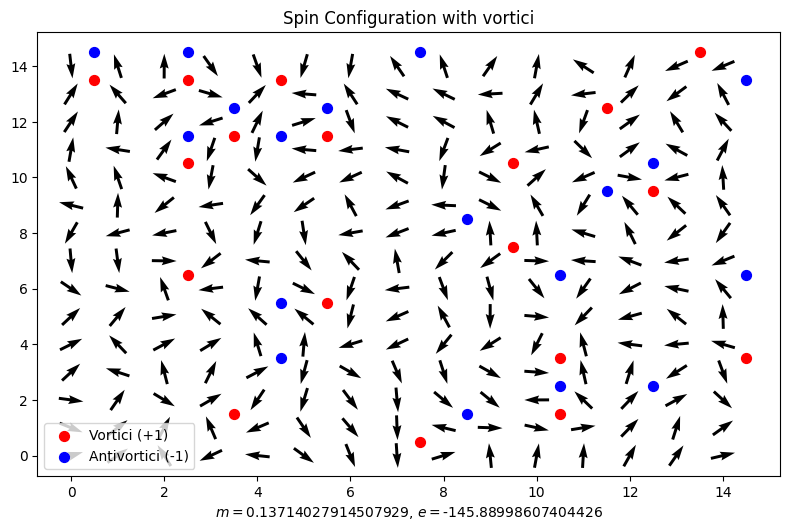

Simulazione T = 1.90
Converge al passo 28900
rateo accettazione è:0.7147697037037037 
Simulazione T = 2.00
Converge al passo 3900
rateo accettazione è:0.72507 


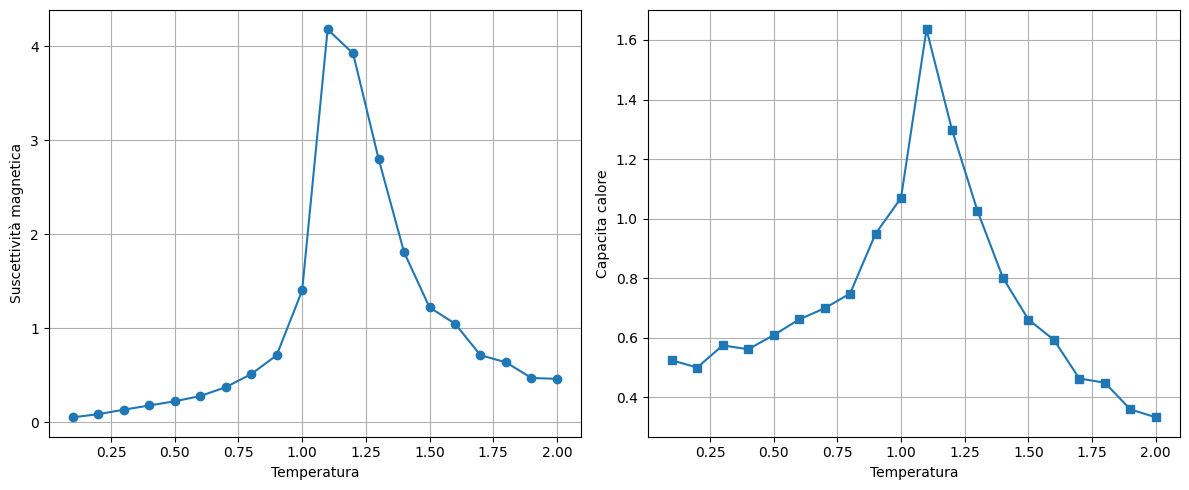

In [8]:

L = 15 #grandezza reticolo
temperature = np.linspace(0.1, 2.0, 20)  # Temperature range
suscettivita = []
capacita_calore = []

# Run simulation for each temperature
for t in temperature:
    print(f"Simulazione T = {t:.2f}")
    model = ModelloXY(L=L, J=1.0, H=0.0, T=t)
    chi, Cv, _ = model.evolvi(
        periodo_termalizzazione= 100000,
        periodo_misura=20000,
        intervallo_misura=10
    )
    if round(t*10)%3==0 or t == 0.1 or round(t*10) == 11:
        model.disegna()
    suscettivita.append(chi)
    capacita_calore.append(Cv)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(temperature, suscettivita, 'o-')
plt.xlabel('Temperatura')
plt.ylabel('Suscettività magnetica')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(temperature, capacita_calore, 's-')
plt.xlabel('Temperatura')
plt.ylabel('Capacita calore')
plt.grid(True)
plt.savefig(f'ModelloXY.png')
plt.tight_layout()
plt.show()

Da i grafici vediamo già un errore la transizione di Kosterlitz-Thouless (KT) dovrebbe essere all'incirca a T=0.9 va avviene a T=1.1 forse è dovuto a un reticolo piccolo finito:
-il calore specifico all'inizio è vicino a zero 
-all'avvicinarsi di Tkt ha un picco più smussato tipico delle transizioni di ordine infinito ed è da questa temperatura che abbiamo la formazione di vortici e antivortici.
-ad aumentare la temperatura il calore specifico decresce perchè le fluttuazioni si saturano.
La suscettività magnetica:
-A temperature basse la suscettività è quasi 0
-Vicino a Tkt la suscettività magnetica diverge
-Dopo Tkt la suscettività magnetica decresce